# 7. 합성곱 신경망(CNN)

# 7.1 전체 구조

- 합성곱 신경망convolutional neural network, CNN
(합성곱 : 컨볼루션. 두 함수 중 하나를 반전, 이동시켜가며 나머지 함수와의 곱을 연이어 적분하는 것)
- 지금까지 본 신경망은 인접하는 계층의 모든 뉴런과 결합되어 있었다. 이를 완전연결fully-connected
라고 하며, 이를 Affine 계층이라는 이름으로 구현했다.
- CNN에는 여기에 합성곱 계층과 풀링 계층이 추가된다. 
Affine-ReLu가 Conv-ReLU-(Pooling)으로 바뀌며 출력에 가까운 층에서는 Affine-ReLU 구성을 
사용할 수 있다. 출력 계층에서는 Affine-Softmax 조합을 사용한다.


- 이전의 신경망과 같이 계층을 조합하여 만들 수 있음
- 합성곱계층(Convolutional layer)과 풀링계층(Pooling layer)이 등장
- 완전연결층(fully conneted) : 인접하는 계층의 모든 뉴런과 결합된 신경망
- CNN의 구조 (합성곱과 풀링계층 추가)

- 그림7.1 완전연결 계층(Affine 계층)으로 이뤄진 네트워크의 예  
<img src='images/fig 7-1.png' width=1000>  
  
  
- 그림7.2 CNN으로 이뤄진 네트워크의 예: 합성곱 계층과 풀링 계층이 새로 추가(회색)  
<img src='images/fig 7-2.png' width=1000>  

# 7.2 합성곱 계층

## 7.2.1 완전연결 계층의 문제점

- 완전연결Affine 계층 : 인접하는 계층의 뉴런이 모두 연결되고 출력의 수는 임의로 정할 수 있다.
- 단점은 데이터의 형상이 무시된다. (가로, 세로, 채널로 구성된 3차원 데이터인 이미지를 1차원 데이터로
평탄화해줘야 한다.)
- 합성곱 계층은 형상을 유지하기 때문에 형상을 가진 데이터의 패턴을 이해할 수 있다.
- CNN에서는 입출력 데이터를 특징 맵feature map이라고도 한다.

- 데이터의 형상이 무시됨 : 3차원 데이터를 1차원 데이터로 평탄화해야 함
- 이미지(3차원)의 형상에는 공간적 정보가 담겨져 있음
- 공간적으로 가까운 픽셀의 값은 비슷하거나, RGB의 각 채널은 서로 밀접연관 등의 패턴
- CNN의 합성곱계층은 형상을 유지 (3차원데이터 입력 / 출력)
- CNN에서는 합성곱 계층의 입출력 데이터를 특징 맵(feature map)이라고도 함 (입력특징맵 / 출력특징맵)

- 그림 

## 7.2.2 합성곱 연산

- 이미지 처리에서 말하는 필터 연산에 해당
- 예시 : 입력데이터는 세로,가로 방향의 형상가짐 (필터도 마찬가지)
- 입력은 (4,4), 필터는 (3,3), 출력은(2,2)의 형상
- 문헌에따라 필터를 커널이라고 지칭
- 합성곱연산은 필터의 윈도우를 일정 간격 이동해가며 입력데이터에 적용
- 입력과 필터에서 대응하는 원소끼리 곱한 후 그 총합 계산 (단일 곱셈-누산, FMA)  

- 그림 7.4 합성곱 연산의 계산 순서    
<img src='images/fig 7-4.png' width=700>  

In [1]:
import numpy as np

x = np.array([[1,2,3,0],[0,1,2,3],[3,0,1,2],[2,3,0,1]])
print('x:')
print(x)

filter = np.array([[2,0,1],[0,1,2],[1,0,2]])
f_h = filter.shape[0]
f_w = filter.shape[1]
print('filter:')
print(filter)

out = np.zeros((2,2))
out_h = out.shape[0]
out_w = out.shape[1]

for i in range(out_h):
    row = i * 1
    for j in range(out_w):
        col = j * 1
        out[i,j] = np.sum(x[row:row+f_h,col:col+f_w] * filter)

print('out:')
print(out)

x:
[[1 2 3 0]
 [0 1 2 3]
 [3 0 1 2]
 [2 3 0 1]]
filter:
[[2 0 1]
 [0 1 2]
 [1 0 2]]
out:
[[15. 16.]
 [ 6. 15.]]


## 7.2.3 패딩

- 합성곱 연산을 수행하기 전 입력 데이터 주변을 특정 값 (ex.0)으로 채우는 것
- 예시 : (4,4)크기의 입력데이터에 폭이 1인 패딩 적용 

- (4,4) 입력데이터에 패딩 추가되어 (6,6)이 됨
- 패딩은 출력크기를 조정할 목적으로 사용
- 연산을 거칠 때 마다 출력의 형상은 계속해서 줄어듬
- 출력크기가 1이 되어버리면 합성곱 연산 불가
- 입력데이터의 공간적크기를 고정한 채 다음계층에 전달가능

- 그림 7.6 합성곱 연산의 패딩 처리 : 입력 데이터 주위에 0을 채운다.   
<img src='images/fig 7-6.png' width=700>  

In [2]:
import numpy as np

pad = 1
stride = 1

x = np.array([[1,2,3,0],[0,1,2,3],[3,0,1,2],[2,3,0,1]])
x_h = x.shape[0]
x_w = x.shape[1]

# 위쪽 1개행, 아래쪽 1개행, 왼쪽 1개열, 오른쪽 1개열 0으로 패딩합니다
# x = np.pad(x, ((1,1),(1,1)), 'constant', constant_values=0)
x = np.pad(x, ((pad,pad),(pad,pad)), 'constant', constant_values=0)
print('padding x:')
print(x)

filter = np.array([[2,0,1],[0,1,2],[1,0,2]])
f_h = filter.shape[0]
f_w = filter.shape[1]
print('filter:')
print(filter)

out_h = int((x_h + 2*pad - f_h)/stride + 1)
out_w = int((x_w + 2*pad - f_w)/stride + 1)

out = np.zeros((out_h, out_w))

for i in range(out_h):
    row = i * stride
    for j in range(out_w):
        col = j * stride
        out[i,j] = np.sum(x[row:row+f_h, col:col+f_w] * filter)

print('out:')
print(out)

padding x:
[[0 0 0 0 0 0]
 [0 1 2 3 0 0]
 [0 0 1 2 3 0]
 [0 3 0 1 2 0]
 [0 2 3 0 1 0]
 [0 0 0 0 0 0]]
filter:
[[2 0 1]
 [0 1 2]
 [1 0 2]]
out:
[[ 7. 12. 10.  2.]
 [ 4. 15. 16. 10.]
 [10.  6. 15.  6.]
 [ 8. 10.  4.  3.]]


## 7.2.4 스트라이드

- 필터를 적용하는 위치의 간격
- 스트라이드를 2로 하면 필터적용 윈도우가 두 칸씩 이동

- 그림 7.7 스트라이드가 2인 합성곱 연산  
<img src='images\fig 7-7.png' width=500>  

- 스트라이드를 키우면 출력크기는 작아짐
- 패딩, 스트라이드, 출력크기의 관계 수식화
- 입력크기(H,W) / 필터크기(FH, FW) / 출력크기(OH, OW) / 패딩 P / 스트라이드 S

- 식 7.1   
<img src='images\e 7.1.png' width=500>  

In [3]:
import numpy as np

pad = 0
stride = 2

x = np.array([[1,2,3,0,1,2,3],[0,1,2,3,0,1,2],[3,0,1,2,3,0,1],[2,3,0,1,2,3,0],
              [1,2,3,0,1,2,3],[0,1,2,3,0,1,2],[3,0,1,2,3,0,1]])
x_h = x.shape[0]
x_w = x.shape[1]

# 위쪽 1개행, 아래쪽 1개행, 왼쪽 1개열, 오른쪽 1개열 0으로 패딩합니다
# x = np.pad(x, ((1,1),(1,1)), 'constant', constant_values=0)
x = np.pad(x, ((pad,pad),(pad,pad)), 'constant', constant_values=0)
print('padding x:')
print(x)

filter = np.array([[2,0,1],[0,1,2],[1,0,2]])
f_h = filter.shape[0]
f_w = filter.shape[1]
print('filter:')
print(filter)

out_h = int((x_h + 2*pad - f_h)/stride + 1)
out_w = int((x_w + 2*pad - f_w)/stride + 1)
out = np.zeros((out_h, out_w))

for i in range(out_h):
    row = i * stride
    for j in range(out_w):
        col = j * stride
        out[i,j] = np.sum(x[row:row+f_h, col:col+f_w] * filter)

print('out:')
print(out)

padding x:
[[1 2 3 0 1 2 3]
 [0 1 2 3 0 1 2]
 [3 0 1 2 3 0 1]
 [2 3 0 1 2 3 0]
 [1 2 3 0 1 2 3]
 [0 1 2 3 0 1 2]
 [3 0 1 2 3 0 1]]
filter:
[[2 0 1]
 [0 1 2]
 [1 0 2]]
out:
[[15. 17. 15.]
 [17. 15. 17.]
 [15. 17. 15.]]


In [4]:
def convolution_matrix(x, filter, pad = 0, stride = 1):

    # x
    x_h = x.shape[0]
    x_w = x.shape[1]

    # padding
    # 위쪽 1개행, 아래쪽 1개행, 왼쪽 1개열, 오른쪽 1개열 0으로 패딩합니다
    # x = np.pad(x, ((1,1),(1,1)), 'constant', constant_values=0)
    x = np.pad(x, ((pad,pad),(pad,pad)), 'constant', constant_values=0)
    # print('padding x:')
    # print(x)

    # filter
    f_h = filter.shape[0]
    f_w = filter.shape[1]
    # print('filter:')
    # print(filter)

    # output
    out_h = int((x_h + 2*pad - f_h)/stride + 1)
    out_w = int((x_w + 2*pad - f_w)/stride + 1)
    out = np.zeros((out_h, out_w))

    for i in range(out_h):
        row = i * stride
        for j in range(out_w):
            col = j * stride
            out[i,j] = np.sum(x[row:row+f_h, col:col+f_w] * filter)
    # print('out:')
    # print(out)
    
    return out

In [6]:
x = np.array([[1,2,3,0,1,2,3],[0,1,2,3,0,1,2],[3,0,1,2,3,0,1],[2,3,0,1,2,3,0],
              [1,2,3,0,1,2,3],[0,1,2,3,0,1,2],[3,0,1,2,3,0,1]])

filter = np.array([[2,0,1],[0,1,2],[1,0,2]])

out = convolution_matrix(x, filter, pad = 0, stride = 2)
out

array([[15., 17., 15.],
       [17., 15., 17.],
       [15., 17., 15.]])

#### 수평 수직 Sobel 필터

-------------------------------------------------
수평 sobel 필터:


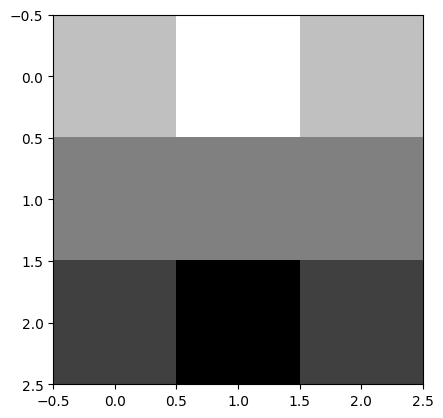

수평 이미지:
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


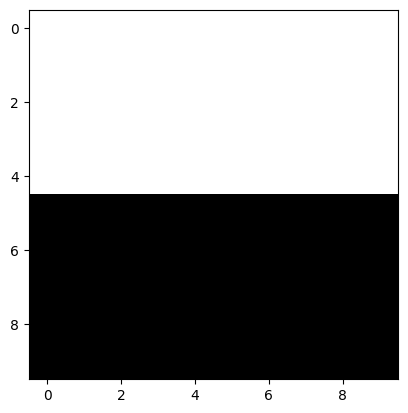

수평 이미지와 수평 sobel 필터의 합성곱:
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [4. 4. 4. 4. 4. 4. 4. 4.]
 [4. 4. 4. 4. 4. 4. 4. 4.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


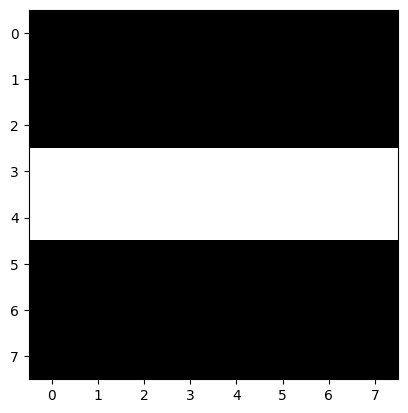

-------------------------------------------------
수직 sobel 필터:


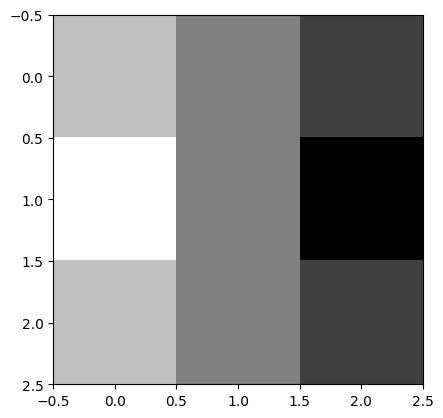

수직 이미지:
[[1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]]


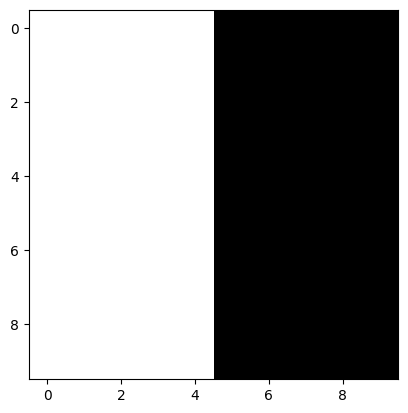

수직 이미지와 수직 sobel 필터의 합성곱:
[[0. 0. 0. 4. 4. 0. 0. 0.]
 [0. 0. 0. 4. 4. 0. 0. 0.]
 [0. 0. 0. 4. 4. 0. 0. 0.]
 [0. 0. 0. 4. 4. 0. 0. 0.]
 [0. 0. 0. 4. 4. 0. 0. 0.]
 [0. 0. 0. 4. 4. 0. 0. 0.]
 [0. 0. 0. 4. 4. 0. 0. 0.]
 [0. 0. 0. 4. 4. 0. 0. 0.]]


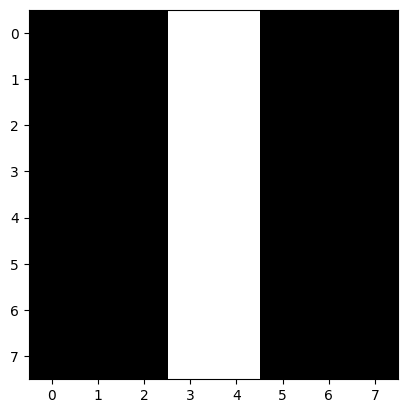

In [7]:
import matplotlib.pyplot as plt
from common.layers import Convolution

filter = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

print('-------------------------------------------------')
print('수평 sobel 필터:')
plt.imshow(filter, cmap=plt.cm.gray)
plt.show()

img=np.zeros((10,10))
img[:5,:]=1
print('수평 이미지:')
print(img)
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

out = convolution_matrix(img, filter, pad = 0, stride = 1)
print('수평 이미지와 수평 sobel 필터의 합성곱:')
print(out)
plt.imshow(out, cmap=plt.cm.gray)
plt.show()

filter = filter.T
print('-------------------------------------------------')
print('수직 sobel 필터:')
plt.imshow(filter, cmap=plt.cm.gray)
plt.show()

img=np.zeros((10,10))
img[:,:5]=1
print('수직 이미지:')
print(img)
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

out = convolution_matrix(img, filter, pad = 0, stride = 1)
print('수직 이미지와 수직 sobel 필터의 합성곱:')
print(out)
plt.imshow(out, cmap=plt.cm.gray)
plt.show()

(256, 256)


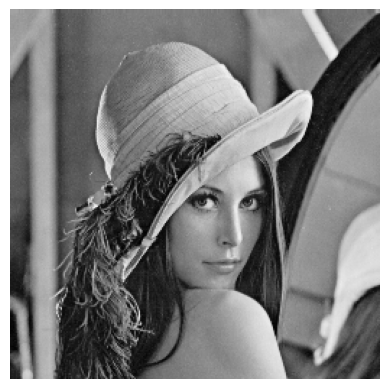

-------------------------------------------------
수평 sobel 필터:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


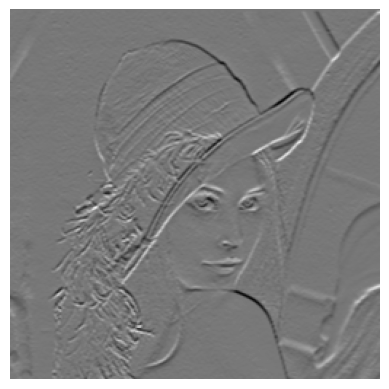

-------------------------------------------------
수직 sobel 필터:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


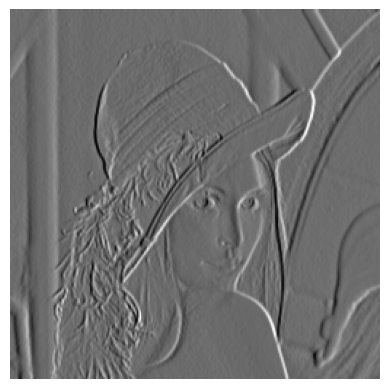

In [12]:
from matplotlib.image import imread

img = imread('./images/lena_gray.png')
print(img.shape)
plt.imshow(img, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
img = img.reshape(1,1,*img.shape)

print('-------------------------------------------------')
w_y = np.array([[[[1,2,1],[0,0,0],[-1,-2,-1]]]])
b=0
print('수평 sobel 필터:')
print(w_y[0][0])

conv_layer = Convolution(w_y, b)
out = conv_layer.forward(img)
out = out.reshape(out.shape[2], out.shape[3])
plt.imshow(out, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

print('-------------------------------------------------')
w_y = w_y.transpose(0,1,3,2)
b=0
print('수직 sobel 필터:')
print(w_y[0][0])

conv_layer = Convolution(w_y, b)
out = conv_layer.forward(img)
out = out.reshape(out.shape[2], out.shape[3])
plt.imshow(out, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

## 7.2.5 3차원 데이터의 합성곱 연산

- 채널 쪽으로 특징 맵이 여러 개 있을 때
- 입력데이터와 필터의 합성곱 연산을 채널마다 수행
- 연산수행 결과 더해서 출력 얻음

- 입력데이터의 채널 수와 필터의 채널 수가 같아야 함
- 필터 자체 크기는 원하는 값으로 설정가능 (모든 채널의 필터는 같은크기)

- 그림 7.8 3차원 데이터 합성곱 연산의 예  
<img src='images\fig 7-8.png' width=1000>  

## 7.2.6 블록으로 생각하기

- 3차원 데이터를 배열로 나타낼 때는 채널, 높이, 너비 순서 (C, H, W) / 필터 (C, FH, FW)
- 출력데이터는 한 장의 특징 맵 : 다수의 채널을 내보내려면 필터를 다수 사용 

- 필터를 FN개 적용하면 출력 맵도 FN개 생성
- FN개의 맵을 모으면 (FN, OH, OW)인 블록 완성
- 합성곱 연산에서는 필터의 수도 고려해야 함

- 필터의 가중치 데이터는 4차원 데이터 (FN×C×FH×FW)
- 편향 추가

- 그림 7.12 합성곱 연산의 처리 흐름(편향 추가)  
<img src='images\fig 7-12.png' width=1000>  

## 7.2.7 배치 처리

- 각 계층을 흐르는 데이터의 차원을 하나 늘려 4차원 데이터로 저장
- (데이터 수, 채널 수, 높이, 너비)

- 그림 7.13 합성곱 연산의 처리 흐름(배치 처리)  
<img src='images\fig 7-13.png' width=1000>  

# 7.3 풀링 계층

- 세로, 가로 방향의 공간을 줄이는 연산
- max pooling : 최댓값을 구하는 연산
- 풀링의 원도우 크기와 스트라이드는 같은 값으로 설정하는 것이 보통


- 그림 7.14 최대 풀링의 처리순서  
<img src='images\fig 7-14.png' width=1000>  

## 7.3.1 풀링 계층의 특징

- 학습해야 할 매개변수가 없다
- 채널 수가 변하지 않는다
- 풀링연산은 채널마다 독립적으로 계산하기 때문에 입력채널 그대로 출력

- 그림 7.15 풀링은 채널 수를 바꾸지 않는다.  
<img src='images\fig 7-15.png' width=1000>  

- 입력의 변화에 영향을 적게 받는다 (강건하다)
- 입력 데이터의 차이를 풀링이 흡수해 사라지게 함

- 그림 7.16 입력 데이터가 가로로 1원소만큼 어긋나도 출력은 같다  
<img src='images\fig 7-16.png' width=1000>  

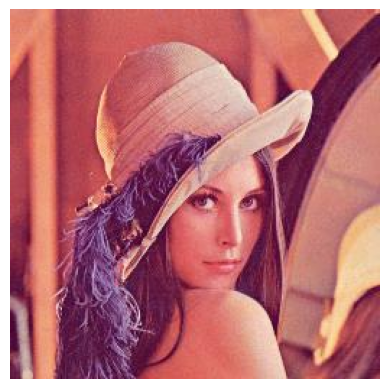

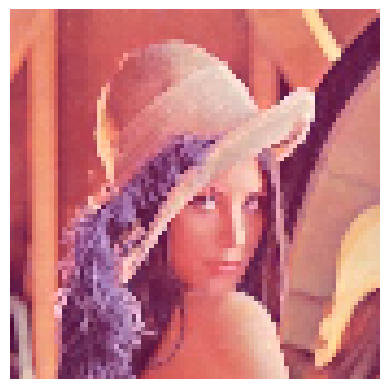

In [3]:
from common.layers import Pooling
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('./images/lena.png')
plt.imshow(img, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

img = img.transpose(2,0,1)
img = img.reshape(1, *img.shape)
pooling_layer = Pooling(3,3,3)
out = pooling_layer.forward(img)
out = out[0]
out = out.transpose(1,2,0)
plt.imshow(out)
plt.axis('off')
plt.show()

# 7.4 합성곱/풀링 계층 구현하기

## 7.4.1 4차원 배열

- CNN의 데이터는 4차원이다.

In [5]:
import numpy as np

x = np.random.rand(10, 1, 28, 28)  # 무작위 데이터 생성
print(x.shape)

# 첫 번째 데이터, 두 번째 데이터
print(x[0].shape)  # (1, 28, 28)
print(x[1].shape)  # (1, 28, 28)

# 첫 번째 데이터의 첫 채널의 공간 데이터
print(x[0, 0])  # or x[0][0]. 28 * 28의 벡터

(10, 1, 28, 28)
(1, 28, 28)
(1, 28, 28)
[[0.37578514 0.16272224 0.3569723  0.51809398 0.28439717 0.05723585
  0.09472003 0.85516219 0.40019473 0.42352535 0.20161462 0.59358272
  0.5490267  0.87663768 0.3537481  0.5331369  0.39639855 0.45231063
  0.87129332 0.58514884 0.38006281 0.29531293 0.69151729 0.59306638
  0.39619755 0.21096375 0.40025336 0.92583097]
 [0.21307008 0.74410295 0.28396772 0.59599263 0.40749585 0.77480723
  0.62644898 0.66186764 0.45402805 0.37369101 0.8399945  0.280904
  0.46439447 0.87135844 0.3225957  0.51079524 0.42961134 0.64640284
  0.95098208 0.73453247 0.37617285 0.29656366 0.03545157 0.65401176
  0.59979736 0.05000441 0.4254467  0.7535574 ]
 [0.65238435 0.57166511 0.55982938 0.24263421 0.89940081 0.51458493
  0.65421064 0.07538151 0.15914289 0.59909242 0.32214856 0.6912552
  0.5581517  0.51038957 0.00237299 0.56712665 0.08865963 0.90843072
  0.15205029 0.80089178 0.36200686 0.14007641 0.24737778 0.03559252
  0.64080109 0.09557966 0.85112316 0.65097372]
 [0.06

## 7.4.2 im2col로 데이터 전개하기

- for문 대신 im2col함수 사용하여 간단 구현
- 3차원 데이터에 im2col 적용하면 2차원 행렬로 바뀜


- 그림 7.17 대략적인 im2col의 동작  
<img src='images\fig 7-17.png' width=700>  

- 그림 7.18 필터 적용 영역을 앞에서부터 순서대로 1줄로 펼친다.  
<img src='images\fig 7-18.png' width=700>  

- 실제 상황에서는 필터 적용 영역이 겹치는 경우가 대부분
- 필터 적용 영역이 겹치게 되면 im2col로 전개한 후의 원소 수가 원래보다 많아짐 (메모리 더 많이 소비)
- 컴퓨터는 큰 행렬을 만들어 계산하는 데 탁월해 효율 높일 수 있음
- im2col 입력 데이터 전개 후 합성곱계층 필터 1열전개하고 행렬곱 계산

## 7.4.3 합성곱 계층 구현하기

- im2col의 인터페이스
- im2col(input_data, filter_h, filter_w, stride=1, pad=0)
    - input_data : (데이터 수, 채널 수, 높이, 너비)의 입력데이터
    - filter_h : 필터의 높이
    - filter_w : 필터의 너비
    - stride : 스트라이드
    - pad : 패딩


In [8]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h) / stride + 1
    out_w = (W + 2*pad - filter_w) / stride + 1

    out_h = int(out_h)
    out_w = int(out_w)

    img = np.pad(input_data, [(0, 0), (0, 0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col

In [9]:
x1 = np.random.rand(1, 3, 7, 7)  # (데이터 수, 채널 수, 높이, 너비)
col1 = im2col(x1, 5, 5)
print(col1.shape)  # (9, 75)

x2 = np.random.rand(10, 3, 7, 7)  # 데이터 10개
col2 = im2col(x2, 5, 5)
print(col2.shape)  # (90, 75)

(9, 75)
(90, 75)


- 그림 7.19 합성곱 연산의 필터 처리 상세과정 : 필터를 세로로 1열로 전개하고, im2col이 전개한 데이터와 행렬 곱을 계산합니다. 마지막으로 출력 데이터를 reshape합니다.  
<img src='images\fig 7-19.png' width=700>  

In [ ]:
class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad

    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = int(1 + (H + 2 * self.pad - FH) / self.stride)
        out_w = int(1 + (W + 2 * self.pad - FW) / self.stride)

        # 입력 데이터와 필터를 2차원 배열로 전개하고 내적한다.
        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T  # 필터 전개
        out = np.dot(col, col_W) + self.b

        # reshape에서 -1 : 원소 개수에 맞춰 적절하게 묶어줌.
        # transpose : 다차원 배열의 축 순서를 바꿔줌(N,H,W,C) -> (N,C,H,W)
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        return out

- reshape 인수 -1로 지정하면 다차원 배열의 원소 수가 변환 후에도 똑같이 유지되도록 묶어줌
- Transpose 함수를 이용해 출력데이터를 적절한 형상으로 바꾸어 줌
- 인덱스를 지정하여 축의 순서 변경
- 역전파에서는 im2col 대신 col2im 함수 사용


## 7.4.4 풀링 계층 구현하기

- 풀링의 경우에는 채널이 독립적이라는 점이 합성곱계층과 다른 점
- 전개 후 최댓값 구하고 적절한 형상으로 바꾸어줌


- 그림 7.22 풀링 계층 구현의 흐름: 풀링 적용 영역에서 가장 큰 원소는 회색으로 표시  
<img src='images\fig 7-22.png' width=700>  

- 풀링 계층 구현의 세 단계
    - 입력데이터 전개
    - 행별 최댓값 구함
    - 적절한 모양으로 성형

In [13]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        # 전개
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h * self.pool_w)

        # 최댓값 axis : 축의 방향, 0=열방향, 1=행방향
        out = np.max(col, axis=1)

        # 성형
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        return out

# 7.5 CNN 구현하기

- conv - relu - pool - affine - relu - affine - softmax 형태
- 초기화(__ init __)에서 받는 파라미터(인수)
    - input_dim : 입력 데이터(채널 수, 높이, 너비)의 차원
    - conv_param : 합성곱 계층의 하이퍼파라미터, 딕셔너리의 키는 다음과 같음
    - filter_num : 필터 수
    - filter_size : 필터 크기
    - stride : 스트라이드
    - pad : 패딩
    - hidden_size : 은닉층(완전연결)의 뉴런 수
    - output_size : 출력층(완전연결)의 뉴런 수
    - weight_init_std : 초기화 때의 가중치 표준편차
- 합성곱계층의 하이퍼파라미터는 딕셔너리 형태로 주어짐

- 그림 7.23 단순한 CNN의 네트워크 구성  
<img src='images\fig 7-23.png' width=700>  

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient
from dataset.mnist import load_mnist
from common.trainer import Trainer
import pickle

In [29]:
class SimpleConvNet:
    """
    다음과 같은 CNN을 구성한다.
    → Conv → ReLU → Pooling → Affine → ReLU → Affine → Softmax →
    전체 구현은 simple_convnet.py 참고
    """
    def __init__(self, input_dim=(1, 28, 28),
                 conv_param={'filter_num': 30, 'filter_size': 5,
                             'pad': 0, 'stride': 1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        # 초기화 인수로 주어진 하이퍼파라미터를 딕셔너리에서 꺼내고 출력 크기를 계산한다.
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / \
            filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) *
                               (conv_output_size/2))

        # 1층의 합성곱 계층과 2, 3층의 완전연결 계층의 가중치와 편향 생성
        self.params = {}
        self.params['W1'] = weight_init_std * \
            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # CNN을 구성하는 계층을 생성
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'],
                                           self.params['b1'],
                                           conv_param['stride'],
                                           conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])
        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        """추론을 수행"""
        for layer in self.layers.values():
            x = layer.forward(x)
        return x

    def loss(self, x, t):
        """손실함수 값 계산"""
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1:
            t = np.argmax(t, axis=1)

        acc = 0.0

        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt)

        return acc / x.shape[0]

    def gradient(self, x, t):
        """오차역전파법으로 기울기를 구함"""
        # 순전파
        self.loss(x, t)

        # 역전파
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'] = self.layers['Conv1'].dW
        grads['b1'] = self.layers['Conv1'].db
        grads['W2'] = self.layers['Affine1'].dW
        grads['b2'] = self.layers['Affine1'].db
        grads['W3'] = self.layers['Affine2'].dW
        grads['b3'] = self.layers['Affine2'].db

        return grads
    
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

In [17]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1, 28, 28),
                        conv_param={'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

train loss:2.2995925622338977
=== epoch:1, train acc:0.244, test acc:0.256 ===
train loss:2.2973000150487484
train loss:2.2945880943123655
train loss:2.2892861074062587
train loss:2.278197702201159
train loss:2.2643982927895876
train loss:2.248519844441993
train loss:2.2353560228107
train loss:2.202626867123334
train loss:2.176001040201866
train loss:2.172531451160791
train loss:2.0900820693273086
train loss:2.1099233367805597
train loss:2.033048251980992
train loss:1.976525489899403
train loss:1.9418839290141736
train loss:1.8315403492560256
train loss:1.7703049581503998
train loss:1.6553655294596368
train loss:1.634454392891592
train loss:1.4475412798002187
train loss:1.440668013405987
train loss:1.3921748124594169
train loss:1.2878666906883673
train loss:1.225046673408714
train loss:1.2477584741438097
train loss:1.0375040125193669
train loss:1.0383465885604641
train loss:0.9294892701961304
train loss:1.0509323109492943
train loss:0.908443898892598
train loss:0.7955890515520424
train

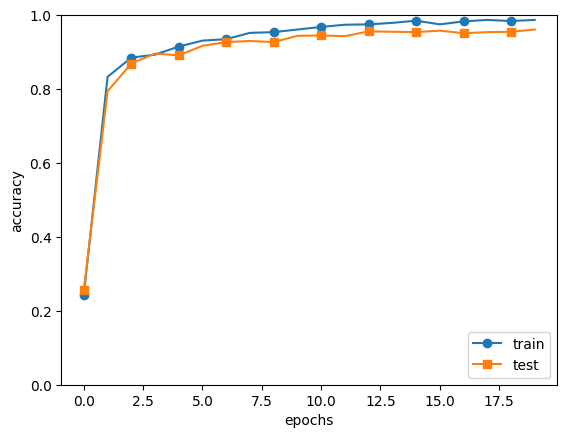

In [18]:
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# 7.6 CNN 시각화하기

## 7.6.1 1번째 층의 가중치 시각화하기

- 1번째 층의 합성곱 계층의 가중치는 (30, 1, 5, 5)
- 채널이 1개라는 것은 필터를 1채널의 회색조 이미지로 시각화 할 수 있다는 뜻

In [26]:
def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

학습 전


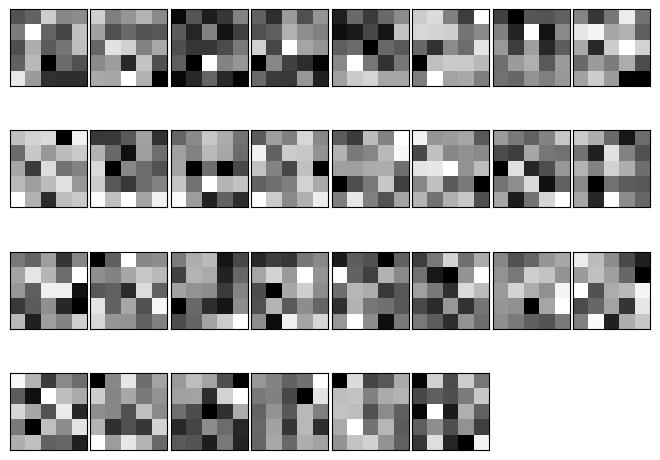

학습 후


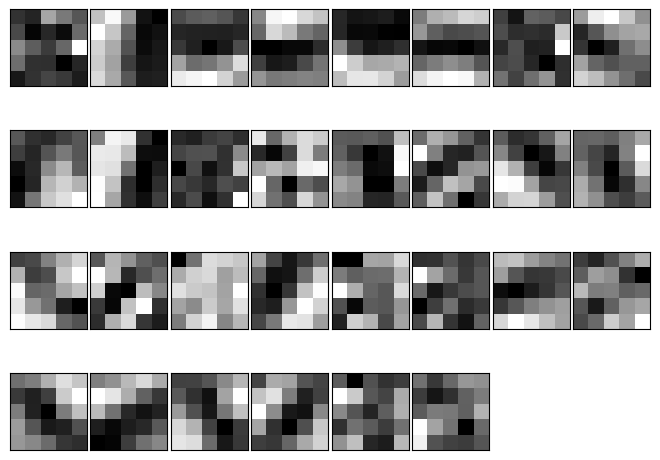

In [32]:
network = SimpleConvNet()
# 무작위(랜덤) 초기화 후의 가중치
print('학습 전')
filter_show(network.params['W1'])

# 학습된 가중치
network.load_params(r'.\deeplearning_from_scratch-master\ch7.CNN\params.pkl')
print('학습 후')
filter_show(network.params['W1'])

- 학습 전 필터는 무작위로 초기화되고 있어 흑백의 정도에 규칙성이 없음
- 학습을 마친 필터는 규칙성 있는 이미지
- 규칙성있는 필터는 에지(색상이 바뀐 경계선)와 볼륨(국소적으로 덩어리진 영역) 등 보고 있음

- 그림 7.25 가로 에지와 세로 에지에 반응하는 필터  
<img src='images\fig 7-25.png' width=700>  

## 7.6.2 층 깊이에 따른 추출 정보 변화


- 계층이 깊어질수록 추출되는 정보는 더 추상화 됨
- 처음 층은 단순한 에지에 반응하고, 이어 텍스처에 반응하고, 더 복잡한 사물의 일부에 반응하도록 변화

- 그림 7-26 CNN의 합성곱 계층에서 추출되는 정보, 1번째 층은 에지와 블롭, 3번째 층은 텍스처, 5번째 층은 사물의 일부, 마지막 완전연결 계층은 사물의 클래스(개, 자동차 등)에 뉴런이 반응한다.
<img src='images\fig 7-26.png' width=1000>  

# 7.7 대표적인 CNN

- LeNet과 AlexNet

# 7.7.1 LeNet

- 손글씨 숫자 인식 네트워크 (1998)
- 합성곱 계층과 풀링계층(단순히 원소를 줄이기만 하는 서브샘플링 계층)
- 마지막으로 완전연결계층 거치면서 결과 출력
- LeNet과 현재 CNN 비교
    - 활성화 함수 : LeNet(sigmoid) / 현재(ReLU)
    - 데이터 크기 줄이기 : LeNet(서브샘플링, 중간데이터 크기 줄임) / 현재(MaxPooling)


- 그림 7-27 LeNet의 구성  
<img src='images\fig 7-27.png' width=1000>  

## 7.7.2 AlexNet

- LeNet과 비교해 바뀐 점
    - 활성화 함수로 ReLU 사용
    - LRN Local Response Normalization이라는 국소적 정규화 실시하는 계층 이용
    - 드롭아웃 사용
    - GPU계산 위해 병렬적인 구조로 설계


- 그림 7-28 AlexNet의 구성  
<img src='images\fig 7-28.png' width=1000>  

# 7.8 정리

- CNN은 지금가지의 완전연결 계층 네트워크에 합성곱 계층과 풀링 계층을 새로 추가한다.
- 합성곱 계층과 풀링 계층은 im2col(이미지를 행렬로 전개하는 함수)을 이용하면 간단하고 효율적으로 구현할 수 있다.
- CNN을 시각화해보면 계층이 깊어질수록 고급 정보가 추출되는 모습을 확인할 수 있다.
- 대표적인 CNN에는 LeNet과 AlexNet이 있다.
- 딥러닝 발전에는 빅데이터와 GPU가 크게 기여했다.